<a href="https://colab.research.google.com/github/naveen-pixel07/2025_ML/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Dataset shape: (506, 14)

Columns: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']


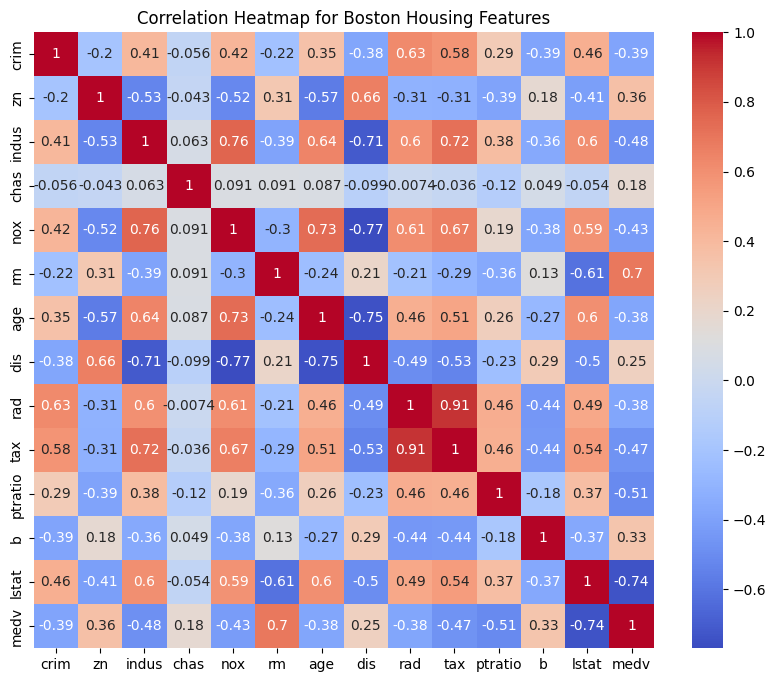

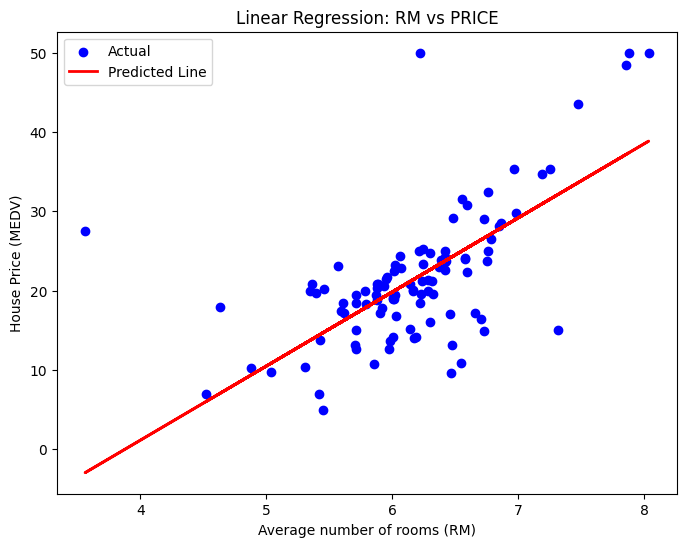

Mean Squared Error: 46.14
R² Score: 0.37
Intercept: -36.25
Coefficient for RM: 9.35


In [11]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the Boston Housing dataset from GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Step 3: Basic Info
print(df.head())
print("\nDataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Step 4: Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Boston Housing Features")
plt.show()

# Step 5: Select Features and Target
X = df[['rm']]  # Average number of rooms per dwelling
y = df['medv']  # Median value of owner-occupied homes

# Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test)

# Step 9: Visualize Linear Relationship
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("Linear Regression: RM vs PRICE")
plt.legend()
plt.show()

# Step 10: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for RM: {model.coef_[0]:.2f}")
